In [1]:
import pandas as pd
import numpy as np

from graph_encoders import *

import xgboost

import networkx as nx

In [2]:
X_quiver_train = pd.read_csv('../data/crop_mapping/quiver_invariant_train.csv')
X_quiver_test = pd.read_csv('../data/crop_mapping/quiver_invariant_test.csv')

X_standard_train = pd.read_csv('../data/crop_mapping/standard_PCA_train.csv')
X_standard_test = pd.read_csv('../data/crop_mapping/standard_PCA_test.csv')

labels_train = pd.read_csv('../data/crop_mapping/selection_labels_train.csv')
labels_test = pd.read_csv('../data/crop_mapping/selection_labels_test.csv')

In [3]:
Xq_tr = X_quiver_train.values
Xq_te = X_quiver_test.values

Xs_tr = X_standard_train.values
Xs_te = X_standard_test.values

# For XGBoost, map the labels to range from 0 to (number of labels) - 1
y_tr = labels_train.values.reshape(-1) - 1
y_te = labels_test.values.reshape(-1) - 1

In [4]:
model = xgboost.XGBClassifier(
    objective='multi_softmax',
    num_class=7,
    learning_rate=1.0,
    max_depth=5,
    n_estimators=10
)
model.fit(Xq_tr, y_tr)
yq_pr = model.predict(Xq_te)

In [5]:
scores = model.get_booster().get_score(importance_type='gain')
new_scores = {}
for i in range(len(X_quiver_train.columns)):
    new_scores[X_quiver_train.columns[i]] = scores[f"f{i}"]

X_quiver_nodes = pd.Series(list(map(lambda s: s.split('_')[0], X_quiver_train.columns)))
X_quivers = list(X_quiver_nodes.unique())

X_quiver_node_groups = {Q: [] for Q in X_quivers}
for i in range(len(X_quiver_train.columns)):
    X_quiver_node_groups[X_quiver_nodes[i]].append(X_quiver_train.columns[i])

node_scores = {}
for node in X_quiver_node_groups.keys():
    node_scores[node] = np.sqrt(np.power(
        np.array(list(map(
            lambda feat: new_scores[feat],
            X_quiver_node_groups[node]
        ))), 
    2).sum())
print(node_scores)

{'Q00': np.float64(490.2646420976092), 'Q01': np.float64(37.18255454428202), 'Q02': np.float64(41.788279081619024), 'Q03': np.float64(341.705901361498), 'Q04': np.float64(325.6762863966383), 'Q05': np.float64(41.3036167914062), 'Q06': np.float64(72.84939503643064), 'Q07': np.float64(157.62299299904438), 'Q08': np.float64(37.55313082850106), 'Q09': np.float64(137.52708217149535), 'Q10': np.float64(24.593161729863247)}


In [7]:
# Most important quivers are Q00, Q03, and Q04
with open("../data/crop_mapping/quiver_reps/q00.json", 'r') as file:
    Q00 = json.load(file, cls=NetworkXQuiverRepresentationDecoder)
with open("../data/crop_mapping/quiver_reps/q03.json", 'r') as file:
    Q03 = json.load(file, cls=NetworkXQuiverRepresentationDecoder)
with open("../data/crop_mapping/quiver_reps/q04.json", 'r') as file:
    Q04 = json.load(file, cls=NetworkXQuiverRepresentationDecoder)

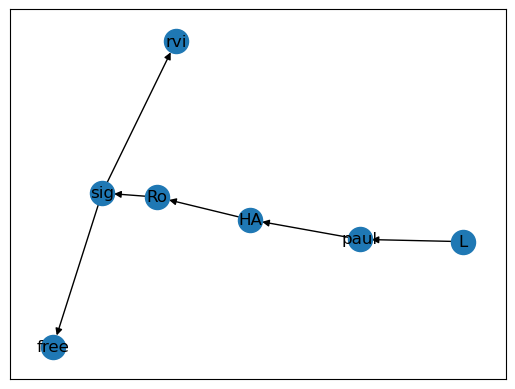

In [8]:
nx.draw_networkx(Q00)

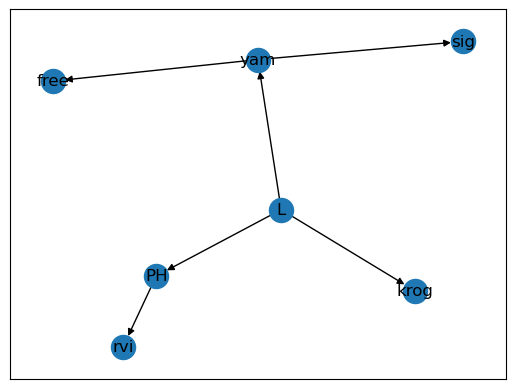

In [9]:
nx.draw_networkx(Q03)

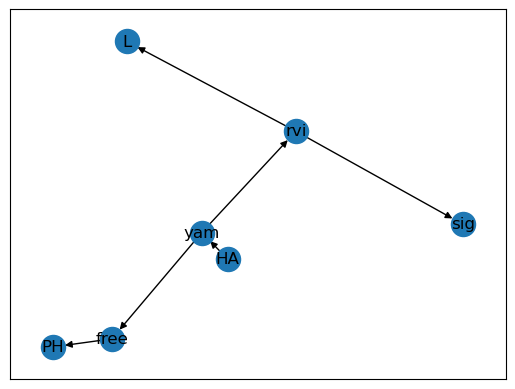

In [10]:
nx.draw_networkx(Q04)